In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    print("First 5 rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    return df

In [3]:
def clean_numeric_column(df, column_dict):
    def cleaner(x):
        
        if isinstance(x, str):
            x = (
                x.replace(",", "")
                 .replace(" NG", "")
                 .replace("??", "")
                 .replace("#", "")
                 .replace(".0", "")
                 .strip()
            )
            try:
                return int(x)
            except ValueError:
                return np.nan
        return x
    for old_col, new_col in column_dict.items():
        df[old_col] = df[old_col].apply(cleaner).astype("Int64")
        df.rename(columns={old_col: new_col}, inplace=True)

    print("\n" + "=" * 60)
    print("NUMERIC COLUMNS CLEANED SUCCESSFULLY")
    print("=" * 60)

    return df

In [4]:
def clean_gender_column(df, column_dict):
    for old_col, new_col in column_dict.items():
        df[old_col] = (
            df[old_col]
            .astype(str) 
            .str.strip() 
            .str.upper() 
            .str[0] )
        df[old_col].replace({
            "U": np.nan,
            "N": np.nan,
            "?": np.nan,
            "M": "Male",
            "F": "Female"}, inplace=True)
        
    for old_col, new_col in column_dict.items():
        df.rename(columns={old_col: new_col}, inplace=True)

    for old_col, new_col in column_dict.items():
        df.rename(columns={old_col: new_col}, inplace=True)
    
    print("\n" + "=" * 60)
    print("GENDER COLUMN CLEANED SUCCESSFULLY")
    print("=" * 60)
        
    return df

In [5]:
def clean_owned_column(df, column_dict):
    for old_col, new_col in column_dict.items():
        df[old_col] = (
            df[old_col]
            .astype(str) 
            .str.strip() 
            .str.upper() 
            .str[0] ) 
        df[old_col].replace({
            "U": np.nan,
            "N": np.nan,
            "?": np.nan,
            "0": "No",
            "1": "Yes"
}, inplace=True)
        
    for old_col, new_col in column_dict.items():
        df.rename(columns={old_col: new_col}, inplace=True)
    
    print("\n" + "=" * 60)
    print("OWNED COLUMNS CLEANED SUCCESSFULLY")
    print("=" * 60)
        
    return df

In [6]:
def clean_categorical_column(df, column_dict):
    for old_col, new_col in column_dict.items():
        df[old_col] = (
            df[old_col]
            .astype(str)
            .str.replace(r"#|,|\.0|\?\?|NG", "", regex=True)
            .str.strip()
            .str.title()
            .replace("", np.nan)
        )
        df[old_col] = (
            df[old_col]
                .replace({
                    "?": np.nan,
                    "Unknown": np.nan,
                    "Nan": np.nan,
                    "": np.nan
                })
        )  
        df.rename(columns={old_col: new_col}, inplace=True)
    
    print("\n" + "=" * 60)
    print("CATEGORICAL COLUMNS CLEANED SUCCESSFULLY")
    print("=" * 60)
    
    return df

In [7]:
def clean_columns():
    df = load_data("../data/raw/Credit_Card_Approval.csv")

    column_dict1 = {
        " Applicant_ID  ": "applicant_id",
        " Total_Children  ": "total_children",
        "TOTAL_INCOME??": "total_income",
        "TOTAL_FAMILY_MEMBERS??": "total_family",
        " Applicant_Age  ": "applicant_age",
        "YEARS_OF_WORKING??": "years_of_working",
        " Total_Bad_Debt  ": "total_bad_debt",
        "TOTAL_GOOD_DEBT??": "total_good_debt",
        " Status  ": "status"
    }
    df = clean_numeric_column(df, column_dict1)

    column_dict2 = {
        "APPLICANT_GENDER??": "applicant_gender"
    }
    df = clean_gender_column(df, column_dict2)

    column_dict3 = {
        " Owned_Car  ": "owned_car",
        "OWNED_REALTY??": "owned_realty",
        " Owned_Mobile_Phone  ": "owned_mobile_phone",
        "OWNED_WORK_PHONE??": "owned_work_phone",
        " Owned_Phone  ": "owned_phone",
        "OWNED_EMAIL??": "owned_email"
    }
    df = clean_owned_column(df, column_dict3)

    column_dict4 = {
        " Income_Type  ": "income_type",
        "EDUCATION_TYPE??": "education_type",
        " Family_Status  ": "family_status",
        "HOUSING_TYPE??": "housing_type",
        " Job_Title  ": "job_title"
    }
    df = clean_categorical_column(df, column_dict4)

    return df

clean_columns()

First 5 rows:
   Applicant_ID   APPLICANT_GENDER??  Owned_Car   OWNED_REALTY??  \
0        5105985,           F             unknown             0#   
1         unknown          M      ??          NaN            1.0   
2         unknown                  ?           0             1??   
3               ?           F      #           0,           0 NG   
4       5050721.0                NaN      unknown            0??   

   Total_Children   TOTAL_INCOME??  \
0           unknown            NaN   
1                0#       180000.0   
2               NaN       112500.0   
3               NaN        270000,   
4               0.0            NaN   

                                       Income_Type    \
0                                                  ?   
1  Working                                       ...   
2                                            unknown   
3  State servant                                 ...   
4  Working                                       ...   

           

C:\Users\USER\AppData\Local\Temp\ipykernel_16764\1974556113.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[old_col].replace({
C:\Users\USER\AppData\Local\Temp\ipykernel_16764\1459605215.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met


OWNED COLUMNS CLEANED SUCCESSFULLY

CATEGORICAL COLUMNS CLEANED SUCCESSFULLY


,applicant_id,applicant_gender,owned_car,owned_realty,total_children,total_income,income_type,education_type,family_status,housing_type,...,owned_work_phone,owned_phone,owned_email,job_title,total_family,applicant_age,years_of_working,total_bad_debt,total_good_debt,status
0,5105985,Female,NaN,No,<NA>,<NA>,NaN,NaN,Married,House / Apartment,...,No,NaN,NaN,NaN,2,53,<NA>,<NA>,<NA>,1
1,<NA>,Male,NaN,Yes,0,180000,Working,Secondary / Secondary Special,Married,House / Apartment,...,NaN,NaN,Yes,Managers,<NA>,45,<NA>,<NA>,28,1
2,<NA>,NaN,No,Yes,<NA>,112500,NaN,NaN,NaN,House / Apartment,...,No,NaN,No,NaN,3,<NA>,<NA>,0,<NA>,1
3,<NA>,Female,No,No,<NA>,270000,State Servant,Higher Education,Married,House / Apartment,...,No,Yes,No,NaN,2,<NA>,<NA>,0,27,1
4,5050721,NaN,NaN,No,0,<NA>,Working,Higher Education,Married,NaN,...,NaN,NaN,No,NaN,2,<NA>,7,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28892,<NA>,Male,NaN,NaN,<NA>,<NA>,Commercial Associate,Secondary / Secondary Special,NaN,NaN,...,NaN,NaN,No,Laborers,<NA>,37,15,0,<NA>,<NA>
28893,5089046,NaN,Yes,No,0,<NA>,NaN,NaN,Widow,NaN,...,NaN,No,No,NaN,1,<NA>,<NA>,<NA>,<NA>,<NA>
28894,5062272,Female,No,Yes,<NA>,<NA>,State Servant,Secondary / Secondary Special,NaN,House / Apartment,...,No,NaN,NaN,NaN,1,33,<NA>,0,17,<NA>
28895,<NA>,Female,NaN,Yes,0,202500,NaN,NaN,Married,House / Apartment,...,No,Yes,No,NaN,2,51,3,<NA>,29,1


In [8]:
df = clean_columns()
df.head()

First 5 rows:
   Applicant_ID   APPLICANT_GENDER??  Owned_Car   OWNED_REALTY??  \
0        5105985,           F             unknown             0#   
1         unknown          M      ??          NaN            1.0   
2         unknown                  ?           0             1??   
3               ?           F      #           0,           0 NG   
4       5050721.0                NaN      unknown            0??   

   Total_Children   TOTAL_INCOME??  \
0           unknown            NaN   
1                0#       180000.0   
2               NaN       112500.0   
3               NaN        270000,   
4               0.0            NaN   

                                       Income_Type    \
0                                                  ?   
1  Working                                       ...   
2                                            unknown   
3  State servant                                 ...   
4  Working                                       ...   

           

C:\Users\USER\AppData\Local\Temp\ipykernel_16764\1974556113.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[old_col].replace({
C:\Users\USER\AppData\Local\Temp\ipykernel_16764\1459605215.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met


OWNED COLUMNS CLEANED SUCCESSFULLY

CATEGORICAL COLUMNS CLEANED SUCCESSFULLY


,applicant_id,applicant_gender,owned_car,owned_realty,total_children,total_income,income_type,education_type,family_status,housing_type,...,owned_work_phone,owned_phone,owned_email,job_title,total_family,applicant_age,years_of_working,total_bad_debt,total_good_debt,status
0,5105985,Female,NaN,No,<NA>,<NA>,NaN,NaN,Married,House / Apartment,...,No,NaN,NaN,NaN,2,53,<NA>,<NA>,<NA>,1
1,<NA>,Male,NaN,Yes,0,180000,Working,Secondary / Secondary Special,Married,House / Apartment,...,NaN,NaN,Yes,Managers,<NA>,45,<NA>,<NA>,28,1
2,<NA>,NaN,No,Yes,<NA>,112500,NaN,NaN,NaN,House / Apartment,...,No,NaN,No,NaN,3,<NA>,<NA>,0,<NA>,1
3,<NA>,Female,No,No,<NA>,270000,State Servant,Higher Education,Married,House / Apartment,...,No,Yes,No,NaN,2,<NA>,<NA>,0,27,1
4,5050721,NaN,NaN,No,0,<NA>,Working,Higher Education,Married,NaN,...,NaN,NaN,No,NaN,2,<NA>,7,0,5,1


In [9]:
df.isnull().sum()

applicant_id          11365
applicant_gender      11462
owned_car             11742
owned_realty          11663
total_children        11689
total_income          11514
income_type           11566
education_type        11456
family_status         11538
housing_type          11521
owned_mobile_phone    11665
owned_work_phone      11622
owned_phone           11660
owned_email           11447
job_title             11546
total_family          11512
applicant_age         11537
years_of_working      11484
total_bad_debt        11585
total_good_debt       11614
status                11445
dtype: int64

In [10]:
req_features = [
    "applicant_gender",
    "total_income",
    "income_type",
    "education_type",
    "family_status",
    "job_title",
    "applicant_age",
    "years_of_working",
    "total_bad_debt",
    "total_good_debt",
    "status" 
]

df = df[req_features]
df.head()

,applicant_gender,total_income,income_type,education_type,family_status,job_title,applicant_age,years_of_working,total_bad_debt,total_good_debt,status
0,Female,<NA>,NaN,NaN,Married,NaN,53,<NA>,<NA>,<NA>,1
1,Male,180000,Working,Secondary / Secondary Special,Married,Managers,45,<NA>,<NA>,28,1
2,NaN,112500,NaN,NaN,NaN,NaN,<NA>,<NA>,0,<NA>,1
3,Female,270000,State Servant,Higher Education,Married,NaN,<NA>,<NA>,0,27,1
4,NaN,<NA>,Working,Higher Education,Married,NaN,<NA>,7,0,5,1


In [11]:
# handling missing values
# req_df["total_income"] = req_df["total_income"].fillna(req_df["total_income"].median())
# req_df["applicant_age"] = req_df["applicant_age"].fillna(req_df["applicant_age"].median())
# req_df["years_of_working"] = req_df["years_of_working"].fillna(req_df["years_of_working"].median())
# req_df["total_good_debt"] = req_df["total_good_debt"].fillna(req_df["total_good_debt"].median())
# req_df["applicant_gender"] = req_df["applicant_gender"].fillna(req_df["applicant_gender"].mode()[0])
# req_df["income_type"] = req_df["income_type"].fillna(req_df["income_type"].mode()[0])
# req_df["education_type"] = req_df["education_type"].fillna(req_df["education_type"].mode()[0])
# req_df["family_status"] = req_df["family_status"].fillna(req_df["family_status"].mode()[0])
# req_df["total_bad_debt"] = req_df["total_bad_debt"].fillna(req_df["total_bad_debt"].median())
# req_df["job_title"] = req_df["job_title"].fillna(req_df["job_title"].mode()[0])
df = df.dropna(subset=["status"])

In [12]:
df.shape

(17452, 11)

In [13]:
# check for duplicates
df.duplicated().sum()

np.int64(2464)

In [14]:
# drop duplicates
df.drop_duplicates()

,applicant_gender,total_income,income_type,education_type,family_status,job_title,applicant_age,years_of_working,total_bad_debt,total_good_debt,status
0,Female,<NA>,NaN,NaN,Married,NaN,53,<NA>,<NA>,<NA>,1
1,Male,180000,Working,Secondary / Secondary Special,Married,Managers,45,<NA>,<NA>,28,1
2,NaN,112500,NaN,NaN,NaN,NaN,<NA>,<NA>,0,<NA>,1
3,Female,270000,State Servant,Higher Education,Married,NaN,<NA>,<NA>,0,27,1
4,NaN,<NA>,Working,Higher Education,Married,NaN,<NA>,7,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
28887,Female,225000,Commercial Associate,Higher Education,NaN,Sales Staff,<NA>,1,<NA>,4,1
28888,NaN,112500,NaN,Higher Education,Married,Accountants,32,7,<NA>,14,1
28889,NaN,<NA>,NaN,Secondary / Secondary Special,NaN,NaN,38,9,0,<NA>,1
28890,Female,121500,Working,Secondary / Secondary Special,Married,NaN,<NA>,<NA>,<NA>,<NA>,1


In [15]:
# req_df = req_df[req_df[""] <= 350_000]

In [16]:
# check for outliers
num_cols = df[[
    "total_income",
    "applicant_age",
    "years_of_working",
    "total_bad_debt",
    "total_good_debt"
]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

total_income         488
applicant_age          0
years_of_working     597
total_bad_debt      1275
total_good_debt        0
dtype: Int64

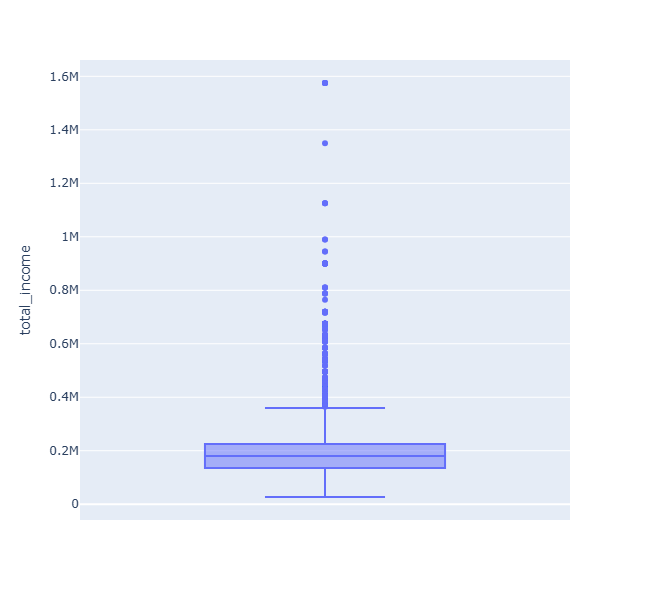

In [17]:
fig = px.box(
    df,
    y="total_income",
    title="",
    width=600,
    height=600
    # yaxis_title= "Numerical Features",
    # vert=False
)
fig.show()

In [19]:
df.to_csv("../data/cleaned/cleaned_credit_card_approval.csv", index=False)

In [ ]:
# df.dropna(inplace=True)
# df.shape